### 정렬 알고리즘 성능 분석  

In [1]:
import random # 난수 생성 모듈
import time # 시간 측정을 위한 모듈
import sys # sys 모듈
import pandas as pd # 데이터들을 한 번에 넣고 빠르게 관리하기 위한 모듈
import matplotlib.pyplot as plt # 데이터들을 그래프로 그려주는 모듈

In [2]:
sys.setrecursionlimit(1000000) # 재귀 호출 제한 해제
listLength = 300 # 리스트의 길이
numberOfExe = 10000 # 실행 횟수 = 10000번

##### 함수 구현부  
1. 선택 정렬 함수(재귀적) - 강의자료에 있는 것과 동일, theLargest함수를 사용해서 최댓값을 얻어온다
2. 버블 정렬 함수(재귀적) - 강의자료에 있는 것과 동일
3. 삽입 정렬 함수(재귀적) - 강의자료에 있는 것과 동일
4. 병합 정렬 함수(재귀적) - 강의자료에 있는 것과 동일
5. 퀵 정렬 함수
6. 힙 정렬 함수
7. 쉘 정렬 함수

In [3]:
# 선택 정렬 함수
def selectionSort(A:list, n:int):
    if n == 1:
        return
    k = theLargest(A, n-1) # 0번 ~ n - 1번 중에 가장 큰 값을 찾아옴
    A[k], A[n-1] = A[n-1], A[k] # 가장 큰 값과 맨 뒷 값 바꾸기
    selectionSort(A, n-1) # 재귀로 최댓값이 정렬된 부분을 제외하고 정렬

def theLargest(A:list, last:int): # 최댓값을 구하는 함수
    largest = 0
    for i in range(last): # 주어진 부분 안에서
        if A[i] > A[largest]: # 가장 큰 부분을 찾아서
            largest = i # 인덱스를 넣음
    return largest # 최댓값의 인덱스를 리턴

In [4]:
# 버블 정렬 함수
def bubbleSort(A:list, n:int):
    for i in range(n-1): # 0번부터 n-1까지
        if A[i] > A[i+1]: # 앞쪽의 값이 뒤쪽보다 크면
            A[i], A[i+1] = A[i+1], A[i] # 서로 값 바꾸기
    if n > 1: # n > 1일때
        bubbleSort(A, n-1) # 재귀로 호출

In [5]:
# 삽입 정렬 함수 - 재귀
def insertionSort(A, start, end):
    value = A[start] # 맨 앞을 시작 위치로 잡는다
    loc = start
    while loc > 0 and A[loc - 1] > value:
        A[loc] = A[loc - 1] # 새로 삽입되는 원소가 이미 정렬된 리스트의 마지막 원소보다 작으면 왼쪽으로 시프트
        loc -= 1 # 정렬하는 원소의 위치를 왼쪽으로 이동
    A[loc] = value # 정해진 위치에 원소 삽입
    if start + 1 < end: # 삽입되는 위치가 가장 마지막 위치보다 작으면
        insertionSort(A, start+1, end) # 재귀호출해서 반복한다.

In [6]:
# 병합 정렬 함수
def mergeSort(A:list, p:int, q:int): # p : 시작, q : 끝
    if p < q: # 시작 인덱스가 끝 인덱스보다 작을 때
        mid = (p+q) // 2 # 중간 부분의 인덱스
        mergeSort(A, p, mid) # 시작부터 중간을 정렬(재귀호출)
        mergeSort(A, mid+1, q) # 중간부터 끝을 정렬(재귀호출)
        merge(A, p, mid+1, q) # 정렬된 리스트끼리 병합
        
def merge(A:list, l, r, end): # 병합 함수(l = 왼쪽 시작 부분, r = 오른쪽 시작 부분)
    i = l # 인덱스 설정
    j = r+1
    t = 0
    
    tmp = [0 for i in range(len(A))] # 임시 저장을 위한 tmp 리스트 만들기
    while i <= r and j <= end:
        if A[i] <= A[j]: # 뒤쪽의 원소가 앞쪽보다 크거나 같으면
            tmp[t] = A[i] # tmp에 앞쪽의 원소를 넣는다.
            t += 1
            i += 1
        else: # 뒤쪽의 원소가 앞쪽보다 작으면
            tmp[t] = A[j] # tmp에 뒤쪽의 원소를 넣는다.
            t += 1
            j += 1
    while i <= r: # 앞쪽에 원소가 남아있으면
        tmp[t] = A[i] # tmp에 넣는다.
        t += 1
        i += 1
    while j <= end: # 뒤쪽에 원소가 남아있으면
        tmp[t] = A[j] # tmp에 넣는다.
        t += 1
        j += 1
    i = l
    t = 0
    while i <= end: # 결과를 tmp에서 A로 옮긴다.
        A[i] = tmp[t]
        t += 1
        i += 1

In [7]:
# 퀵 정렬 함수
def quickSort(A:list, p:int, r:int):
    if r <= p: # 끝 부분까지 도달하면 종료
        return
    q = partition(A, p, r) # 중간을 기준으로 분할
    quickSort(A, p, q-1) # p ~ 중간으로 재귀호출하여 정렬
    quickSort(A, q, r) # 중간 ~ r로 재귀호출하여 정렬

def partition(A:list, p:int, r:int):
    x = A[(p+r) // 2] # x를 A의 중간 인덱스 값으로 잡음
    while p <= r: # p가 r에 도달할 때까지 반복
        while A[p] < x: # x가 p인덱스의 값 보다 크면
            p += 1 # p 1 증가
        while A[r] > x: # x가 r인덱스의 값보다 작으면
            r -= 1 # r 1 감소
        if p <= r: # p가 r보다 작거나 같으면
            A[p], A[r] = A[r], A[p] # p인덱스의 값과 r인덱스의 값을 서로 바꾼다.
            p, r = p + 1, r - 1
    return p # 인덱스 p를 리턴

In [8]:
# 힙 정렬 함수
def heapSort(A):
    buildHeap(A) # 리스트 A를 가지고 힙을 만든다.
    for last in range(len(A)-1, 0, -1): # 밑에서부터 위로
        A[last], A[0] = A[0], A[last] # 가장 위에 있는 값과 서로 바꾸기
        percolateDown(A, 0, last - 1) # 스며내리기를 실행해서 힙 조건을 맞춘다.

def buildHeap(A):
    for i in range(len(A) - 2 // 2, -1, -1): # 부모노드부터
        percolateDown(A, i, len(A) - 1) # 스며내리기
def percolateDown(A, k:int, end:int):
    child = 2*k + 1 # 왼쪽 자식 노드의 인덱스
    right = 2*k + 2 # 오른쪽 자식 노드의 인덱스
    if child <= end: # 왼쪽 자식 노드가 마지막 부분이 아닐때
        if right <= end and A[child] < A[right]: # 오른쪽 자식 노드가 왼쪽 자식 노드보다 크면
            child = right # 바꾸고자 하는 타겟 노드 인덱스를 오른쪽 자식 노드의 인덱스로 변경
        if A[k] < A[child]: # 바꾸고자 하는 타겟 노드의 값이 부모 노드보다 크면
            A[k], A[child] = A[child], A[k] # 서로 위치를 바꾼다.
            percolateDown(A, child, end) # 재귀 호출

In [9]:
# 쉘 정렬 함수
def shellSort(A:list):
    H = gapSequence(len(A))
    for h in H:
        for k in range(h):
            stepInsertionSort(A, k, h)
def stepInsertionSort(A, k:int, h:int): # 위치별로 삽입 정렬
    for i in range(k + h, len(A), h): # k + h부터 h를 더하면서 반복
        j = i-h
        newItem = A[i]
        while 0 <= j and newItem < A[j]:
            A[j+h] = A[j]
            j -= h
        A[j + h] = newItem
def gapSequence(n:int): # 갭 수열을 만드는 함수
    H = [1]
    gap = 1
    while gap < n/5:
        gap = 3 * gap + 1 # 1, 4, 13, ...
        H.append(gap)
    H.reverse() # 수열을 뒤집는다
    return H # 만들어진 수열 리턴

##### 실행부  
10000번 씩 실행

In [10]:
df = pd.DataFrame() # 빈 데이터 프레임 생성

In [11]:
# 선택 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Selection Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    selectionSort(A, listLength) # 선택 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['selectionSort'] = pd.DataFrame(sortTimes) # selectionSort 열에 걸린 시간들 전체 저장

Execution Number of Selection Sort: 99
Execution Number of Selection Sort: 199
Execution Number of Selection Sort: 299
Execution Number of Selection Sort: 399
Execution Number of Selection Sort: 499
Execution Number of Selection Sort: 599
Execution Number of Selection Sort: 699
Execution Number of Selection Sort: 799
Execution Number of Selection Sort: 899
Execution Number of Selection Sort: 999
Execution Number of Selection Sort: 1099
Execution Number of Selection Sort: 1199
Execution Number of Selection Sort: 1299
Execution Number of Selection Sort: 1399
Execution Number of Selection Sort: 1499
Execution Number of Selection Sort: 1599
Execution Number of Selection Sort: 1699
Execution Number of Selection Sort: 1799
Execution Number of Selection Sort: 1899
Execution Number of Selection Sort: 1999
Execution Number of Selection Sort: 2099
Execution Number of Selection Sort: 2199
Execution Number of Selection Sort: 2299
Execution Number of Selection Sort: 2399
Execution Number of Selecti

In [12]:
# 버블 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Bubble Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    bubbleSort(A, listLength) # 버블 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['bubbleSort'] = pd.DataFrame(sortTimes) # bubbleSort 열에 걸린 시간들 전체 저장

Execution Number of Bubble Sort: 99
Execution Number of Bubble Sort: 199
Execution Number of Bubble Sort: 299
Execution Number of Bubble Sort: 399
Execution Number of Bubble Sort: 499
Execution Number of Bubble Sort: 599
Execution Number of Bubble Sort: 699
Execution Number of Bubble Sort: 799
Execution Number of Bubble Sort: 899
Execution Number of Bubble Sort: 999
Execution Number of Bubble Sort: 1099
Execution Number of Bubble Sort: 1199
Execution Number of Bubble Sort: 1299
Execution Number of Bubble Sort: 1399
Execution Number of Bubble Sort: 1499
Execution Number of Bubble Sort: 1599
Execution Number of Bubble Sort: 1699
Execution Number of Bubble Sort: 1799
Execution Number of Bubble Sort: 1899
Execution Number of Bubble Sort: 1999
Execution Number of Bubble Sort: 2099
Execution Number of Bubble Sort: 2199
Execution Number of Bubble Sort: 2299
Execution Number of Bubble Sort: 2399
Execution Number of Bubble Sort: 2499
Execution Number of Bubble Sort: 2599
Execution Number of Bub

In [13]:
# 삽입 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Insertion Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    insertionSort(A, 1, listLength) # 버블 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['insertionSort'] = pd.DataFrame(sortTimes) # insertionSort 열에 걸린 시간들 전체 저장

Execution Number of Insertion Sort: 99
Execution Number of Insertion Sort: 199
Execution Number of Insertion Sort: 299
Execution Number of Insertion Sort: 399
Execution Number of Insertion Sort: 499
Execution Number of Insertion Sort: 599
Execution Number of Insertion Sort: 699
Execution Number of Insertion Sort: 799
Execution Number of Insertion Sort: 899
Execution Number of Insertion Sort: 999
Execution Number of Insertion Sort: 1099
Execution Number of Insertion Sort: 1199
Execution Number of Insertion Sort: 1299
Execution Number of Insertion Sort: 1399
Execution Number of Insertion Sort: 1499
Execution Number of Insertion Sort: 1599
Execution Number of Insertion Sort: 1699
Execution Number of Insertion Sort: 1799
Execution Number of Insertion Sort: 1899
Execution Number of Insertion Sort: 1999
Execution Number of Insertion Sort: 2099
Execution Number of Insertion Sort: 2199
Execution Number of Insertion Sort: 2299
Execution Number of Insertion Sort: 2399
Execution Number of Inserti

In [14]:
# 병합 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Merge Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    mergeSort(A, 0, listLength-1) # 병합 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['mergeSort'] = pd.DataFrame(sortTimes) # mergeSort 열에 걸린 시간들 전체 저장

Execution Number of Merge Sort: 99
Execution Number of Merge Sort: 199
Execution Number of Merge Sort: 299
Execution Number of Merge Sort: 399
Execution Number of Merge Sort: 499
Execution Number of Merge Sort: 599
Execution Number of Merge Sort: 699
Execution Number of Merge Sort: 799
Execution Number of Merge Sort: 899
Execution Number of Merge Sort: 999
Execution Number of Merge Sort: 1099
Execution Number of Merge Sort: 1199
Execution Number of Merge Sort: 1299
Execution Number of Merge Sort: 1399
Execution Number of Merge Sort: 1499
Execution Number of Merge Sort: 1599
Execution Number of Merge Sort: 1699
Execution Number of Merge Sort: 1799
Execution Number of Merge Sort: 1899
Execution Number of Merge Sort: 1999
Execution Number of Merge Sort: 2099
Execution Number of Merge Sort: 2199
Execution Number of Merge Sort: 2299
Execution Number of Merge Sort: 2399
Execution Number of Merge Sort: 2499
Execution Number of Merge Sort: 2599
Execution Number of Merge Sort: 2699
Execution Nu

In [15]:
# 퀵 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Quick Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    quickSort(A, 0, listLength-1) # 퀵 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['quickSort'] = pd.DataFrame(sortTimes) # quickSort 열에 걸린 시간들 전체 저장

Execution Number of Quick Sort: 99
Execution Number of Quick Sort: 199
Execution Number of Quick Sort: 299
Execution Number of Quick Sort: 399
Execution Number of Quick Sort: 499
Execution Number of Quick Sort: 599
Execution Number of Quick Sort: 699
Execution Number of Quick Sort: 799
Execution Number of Quick Sort: 899
Execution Number of Quick Sort: 999
Execution Number of Quick Sort: 1099
Execution Number of Quick Sort: 1199
Execution Number of Quick Sort: 1299
Execution Number of Quick Sort: 1399
Execution Number of Quick Sort: 1499
Execution Number of Quick Sort: 1599
Execution Number of Quick Sort: 1699
Execution Number of Quick Sort: 1799
Execution Number of Quick Sort: 1899
Execution Number of Quick Sort: 1999
Execution Number of Quick Sort: 2099
Execution Number of Quick Sort: 2199
Execution Number of Quick Sort: 2299
Execution Number of Quick Sort: 2399
Execution Number of Quick Sort: 2499
Execution Number of Quick Sort: 2599
Execution Number of Quick Sort: 2699
Execution Nu

In [16]:
# 힙 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Heap Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    heapSort(A) # 힙 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['heapSort'] = pd.DataFrame(sortTimes) # heapSort 열에 걸린 시간들 전체 저장

Execution Number of Heap Sort: 99
Execution Number of Heap Sort: 199
Execution Number of Heap Sort: 299
Execution Number of Heap Sort: 399
Execution Number of Heap Sort: 499
Execution Number of Heap Sort: 599
Execution Number of Heap Sort: 699
Execution Number of Heap Sort: 799
Execution Number of Heap Sort: 899
Execution Number of Heap Sort: 999
Execution Number of Heap Sort: 1099
Execution Number of Heap Sort: 1199
Execution Number of Heap Sort: 1299
Execution Number of Heap Sort: 1399
Execution Number of Heap Sort: 1499
Execution Number of Heap Sort: 1599
Execution Number of Heap Sort: 1699
Execution Number of Heap Sort: 1799
Execution Number of Heap Sort: 1899
Execution Number of Heap Sort: 1999
Execution Number of Heap Sort: 2099
Execution Number of Heap Sort: 2199
Execution Number of Heap Sort: 2299
Execution Number of Heap Sort: 2399
Execution Number of Heap Sort: 2499
Execution Number of Heap Sort: 2599
Execution Number of Heap Sort: 2699
Execution Number of Heap Sort: 2799
Exe

In [17]:
# 쉘 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Shell Sort: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    shellSort(A) # 힙 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['shellSort'] = pd.DataFrame(sortTimes) # shellSort 열에 걸린 시간들 전체 저장

Execution Number of Shell Sort: 99
Execution Number of Shell Sort: 199
Execution Number of Shell Sort: 299
Execution Number of Shell Sort: 399
Execution Number of Shell Sort: 499
Execution Number of Shell Sort: 599
Execution Number of Shell Sort: 699
Execution Number of Shell Sort: 799
Execution Number of Shell Sort: 899
Execution Number of Shell Sort: 999
Execution Number of Shell Sort: 1099
Execution Number of Shell Sort: 1199
Execution Number of Shell Sort: 1299
Execution Number of Shell Sort: 1399
Execution Number of Shell Sort: 1499
Execution Number of Shell Sort: 1599
Execution Number of Shell Sort: 1699
Execution Number of Shell Sort: 1799
Execution Number of Shell Sort: 1899
Execution Number of Shell Sort: 1999
Execution Number of Shell Sort: 2099
Execution Number of Shell Sort: 2199
Execution Number of Shell Sort: 2299
Execution Number of Shell Sort: 2399
Execution Number of Shell Sort: 2499
Execution Number of Shell Sort: 2599
Execution Number of Shell Sort: 2699
Execution Nu

In [18]:
df # 정리된 표 출력

,selectionSort,bubbleSort,insertionSort,mergeSort,quickSort,heapSort,shellSort
0,0.001996,0.005982,0.005973,0.013955,0.000000,0.003993,0.000000
1,0.001996,0.006982,0.003990,0.007007,0.000995,0.001998,0.000997
2,0.002991,0.005985,0.003989,0.007983,0.000998,0.001991,0.001012
3,0.002993,0.005984,0.004986,0.007977,0.000998,0.000998,0.000983
4,0.002004,0.005984,0.004986,0.006981,0.000000,0.000998,0.001000
...,...,...,...,...,...,...,...
9995,0.002992,0.005985,0.004001,0.004352,0.000000,0.000998,0.000000
9996,0.002992,0.005985,0.003982,0.004985,0.000000,0.000997,0.000997
9997,0.001996,0.005985,0.002992,0.005133,0.000000,0.000997,0.000996
9998,0.001996,0.005985,0.003989,0.004988,0.000999,0.000997,0.000000


##### 속도 비교 그래프

<AxesSubplot:>

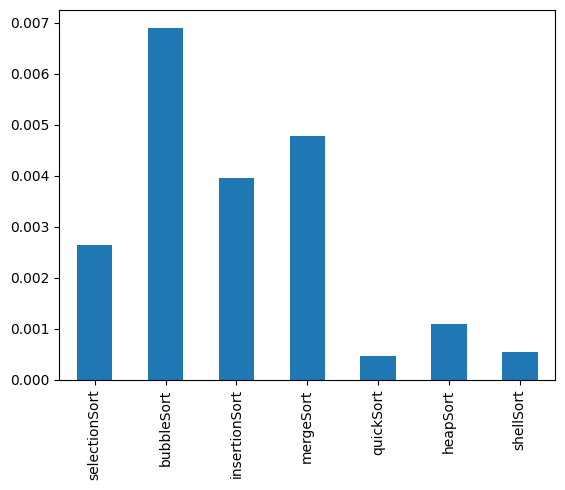

In [19]:
df.mean().plot(kind='bar') # 평균을 막대그래프로 표현

##### 속도 차이 분석하기
분석 결과 : quickSort가 가장 빠르고 shellSort, heapSort 순으로 나왔다. 버블 정렬(bubbleSort)가 가장 느리게 나온 것을 보아 여기까지는 문제가 없다. 다만 selectionSort와 insertionSort의 속도차이가 이론과 맞지 않았다. 그래서 좀 더 세부적인 분석을 해보았다.

In [20]:
import numpy as np # 분석에 필요한 모듈
from scipy.stats import * # 그래프를 그리기 위해 정규화, 표준화를 해주는 모듈

In [21]:
df['selectionSort'].min()

0.0016491413116455078

In [22]:
df['insertionSort'].min()

0.002504110336303711

In [23]:
df['selectionSort'].max()

0.0069828033447265625

In [24]:
df['insertionSort'].max()

0.010972261428833008

이론과 가장 큰 차이가 발생한 선택정렬과 삽입정렬의 결과에서 가장 적은 시간이 걸린 경우와 가장 긴 시간이 걸린 경우를 비교해보면 두 경우 모두 선택정렬이 빠르게 나왔다.

정규분포 그래프를 그려보았다.

In [25]:
df_selectionSort = df['selectionSort']
df_bubbleSort = df['bubbleSort']
df_insertionSort = df['insertionSort']
df_mergeSort = df['mergeSort']
df_quickSort = df['quickSort']
df_heapSort = df['heapSort']
df_shellSort = df['shellSort']

In [26]:
sS_mean = np.mean(df_selectionSort)
sS_std = np.std(df_selectionSort)
sS_pdf = norm.pdf(df_selectionSort.sort_values(), sS_mean, sS_std)

In [27]:
bbS_mean = np.mean(df_bubbleSort)
bbS_std = np.std(df_bubbleSort)
bbS_pdf = norm.pdf(df_bubbleSort.sort_values(), bbS_mean, bbS_std)

In [28]:
iS_mean = np.mean(df_insertionSort)
iS_std = np.std(df_insertionSort)
iS_pdf = norm.pdf(df_insertionSort.sort_values(), iS_mean, iS_std)

In [29]:
mS_mean = np.mean(df_mergeSort)
mS_std = np.std(df_mergeSort)
mS_pdf = norm.pdf(df_mergeSort.sort_values(), mS_mean, mS_std)

In [30]:
qS_mean = np.mean(df_quickSort)
qS_std = np.std(df_quickSort)
qS_pdf = norm.pdf(df_quickSort.sort_values(), qS_mean, qS_std)

In [31]:
hS_mean = np.mean(df_heapSort)
hS_std = np.std(df_heapSort)
hS_pdf = norm.pdf(df_heapSort.sort_values(), hS_mean, hS_std)

In [32]:
shS_mean = np.mean(df_shellSort)
shS_std = np.std(df_shellSort)
shS_pdf = norm.pdf(df_shellSort.sort_values(), shS_mean, shS_std)

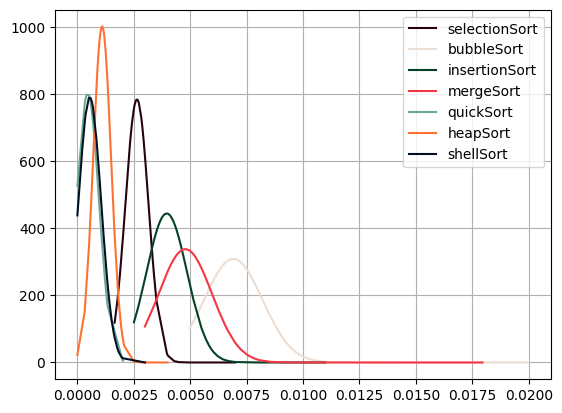

<Figure size 4480x3360 with 0 Axes>

In [33]:
plt.plot(df_selectionSort.sort_values(), sS_pdf, color="#270213", label="selectionSort")
plt.plot(df_bubbleSort.sort_values(), bbS_pdf, color="#ebded4", label="bubbleSort")
plt.plot(df_insertionSort.sort_values(), iS_pdf, color="#044226", label="insertionSort")
plt.plot(df_mergeSort.sort_values(), mS_pdf, color="#f43645", label="mergeSort")
plt.plot(df_quickSort.sort_values(), qS_pdf, color="#6ca992", label="quickSort")
plt.plot(df_heapSort.sort_values(), hS_pdf, color="#fd7133", label="heapSort")
plt.plot(df_shellSort.sort_values(), shS_pdf, color="#011023", label="shellSort")
plt.legend()
plt.grid()
plt.figure(dpi=700)
plt.show()

오른쪽으로 갈 수록 시간이 많이 걸린 것이고 왼쪽에 있으면 시간이 적게 걸린 것.
위로 솟아있는 heapSort 같은 경우에는 대부분의 경우에 평균 시간에 근접하게 나타난 것이다.

표준정규분포를 나타내기 위해 표준화 과정을 거쳤다.

In [34]:
sS_normal = (df_selectionSort.sort_values() - sS_mean) / sS_std
bbS_normal = (df_bubbleSort.sort_values() - bbS_mean) / bbS_std
iS_normal = (df_insertionSort.sort_values() - iS_mean) / iS_std
mS_normal = (df_mergeSort.sort_values() - mS_mean) / mS_std

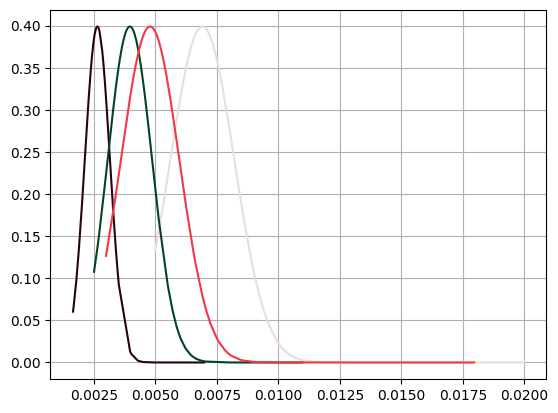

In [35]:
plt.plot(df_selectionSort.sort_values(), norm.pdf(sS_normal, loc=0, scale=1), color="#270213", label="selectionSort")
plt.plot(df_bubbleSort.sort_values(), norm.pdf(bbS_normal, loc=0, scale=1), color="#ebded4", label="bubbleSort")
plt.plot(df_insertionSort.sort_values(), norm.pdf(iS_normal, loc=0, scale=1), color="#044226", label="insertionSort")
plt.plot(df_mergeSort.sort_values(), norm.pdf(mS_normal, loc=0, scale=1), color="#f43645", label="mergeSort")

plt.grid()
plt.show()

##### 알고리즘 고속화

In [36]:
def selectionSort2(A:list):
    if A != []:
        x = min(A)
        A.remove(x)
        return [x] + selectionSort2(A)
    else:
        return []

In [37]:
A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
A = selectionSort2(A) # 선택 정렬 실행
print(A)

[1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 13, 14, 14, 15, 15, 16, 16, 17, 17, 17, 19, 20, 20, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 25, 25, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 30, 30, 30, 30, 31, 31, 32, 32, 32, 32, 32, 33, 33, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 41, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 45, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 49, 50, 51, 51, 51, 53, 53, 53, 54, 55, 55, 56, 56, 56, 57, 57, 57, 59, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 65, 65, 65, 65, 66, 66, 67, 67, 68, 69, 69, 69, 70, 70, 70, 71, 71, 71, 72, 72, 72, 73, 73, 73, 73, 73, 73, 75, 75, 75, 76, 76, 76, 76, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 83, 83, 83, 83, 84, 84, 85, 85, 85, 86, 8

In [38]:
# 선택 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Selection Sort2: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    A = selectionSort2(A) # 선택 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['selectionSort2'] = pd.DataFrame(sortTimes) # selectionSort 열에 걸린 시간들 전체 저장

Execution Number of Selection Sort2: 99
Execution Number of Selection Sort2: 199
Execution Number of Selection Sort2: 299
Execution Number of Selection Sort2: 399
Execution Number of Selection Sort2: 499
Execution Number of Selection Sort2: 599
Execution Number of Selection Sort2: 699
Execution Number of Selection Sort2: 799
Execution Number of Selection Sort2: 899
Execution Number of Selection Sort2: 999
Execution Number of Selection Sort2: 1099
Execution Number of Selection Sort2: 1199
Execution Number of Selection Sort2: 1299
Execution Number of Selection Sort2: 1399
Execution Number of Selection Sort2: 1499
Execution Number of Selection Sort2: 1599
Execution Number of Selection Sort2: 1699
Execution Number of Selection Sort2: 1799
Execution Number of Selection Sort2: 1899
Execution Number of Selection Sort2: 1999
Execution Number of Selection Sort2: 2099
Execution Number of Selection Sort2: 2199
Execution Number of Selection Sort2: 2299
Execution Number of Selection Sort2: 2399
Exe

<AxesSubplot:>

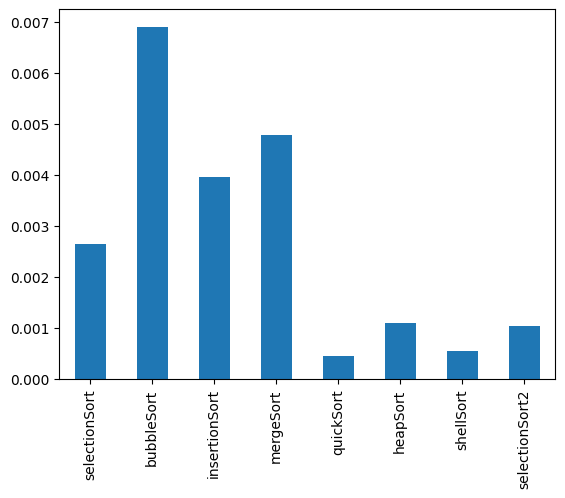

In [39]:
df.mean().plot(kind="bar")

In [40]:
# 삽입 정렬 함수 - 비재귀
def insertionSort2(A:list, n:int):
    for i in range(1, n): # 1번부터 마지막 인덱스 번호까지 반복
        now = A[i] # 현재 인덱스 번호의 원소를 now로 한다.
        j = i-1 # 비교할 부분을 now의 왼쪽 원소로 한다.
        while j >= 0 and A[j] > now: # 왼쪽 원소가 더 크면
            A[j+1] = A[j] # 시프트
            j -= 1 # 정렬하는 원소의 위치를 왼쪽으로 이동
            if A[j] == now:
                break
        A[j+1] = now # 정해진 위치에 원소를 삽입한다.

In [41]:
# 삽입 정렬2
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Insertion Sort2: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    insertionSort2(A, len(A)) # 삽입 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['insertionSort2'] = pd.DataFrame(sortTimes) # insertionSort2 열에 걸린 시간들 전체 저장

Execution Number of Insertion Sort2: 99
Execution Number of Insertion Sort2: 199
Execution Number of Insertion Sort2: 299
Execution Number of Insertion Sort2: 399
Execution Number of Insertion Sort2: 499
Execution Number of Insertion Sort2: 599
Execution Number of Insertion Sort2: 699
Execution Number of Insertion Sort2: 799
Execution Number of Insertion Sort2: 899
Execution Number of Insertion Sort2: 999
Execution Number of Insertion Sort2: 1099
Execution Number of Insertion Sort2: 1199
Execution Number of Insertion Sort2: 1299
Execution Number of Insertion Sort2: 1399
Execution Number of Insertion Sort2: 1499
Execution Number of Insertion Sort2: 1599
Execution Number of Insertion Sort2: 1699
Execution Number of Insertion Sort2: 1799
Execution Number of Insertion Sort2: 1899
Execution Number of Insertion Sort2: 1999
Execution Number of Insertion Sort2: 2099
Execution Number of Insertion Sort2: 2199
Execution Number of Insertion Sort2: 2299
Execution Number of Insertion Sort2: 2399
Exe

In [42]:
def insertionSort3(A:list, n:int):
    now = A[n]
    j = n-1
    while j >= 0 and A[j] > now:
        A[j+1] = A[j]
        j -= 1
        if A[j] == now:
            break
    A[j+1] = now
    if n+1 < len(A):
        insertionSort3(A, n+1)

In [43]:
A = [10, 9, 8, 7, 6, 5, 6, 7] # 300개의 0~100 사이의 난수를 넣는다
insertionSort3(A,1)
print(A)

[5, 6, 6, 7, 7, 8, 9, 10]


In [44]:
# 삽입 정렬3
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Insertion Sort3: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    insertionSort3(A, 1) # 삽입 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['insertionSort3'] = pd.DataFrame(sortTimes) # insertionSort3 열에 걸린 시간들 전체 저장

Execution Number of Insertion Sort3: 99
Execution Number of Insertion Sort3: 199
Execution Number of Insertion Sort3: 299
Execution Number of Insertion Sort3: 399
Execution Number of Insertion Sort3: 499
Execution Number of Insertion Sort3: 599
Execution Number of Insertion Sort3: 699
Execution Number of Insertion Sort3: 799
Execution Number of Insertion Sort3: 899
Execution Number of Insertion Sort3: 999
Execution Number of Insertion Sort3: 1099
Execution Number of Insertion Sort3: 1199
Execution Number of Insertion Sort3: 1299
Execution Number of Insertion Sort3: 1399
Execution Number of Insertion Sort3: 1499
Execution Number of Insertion Sort3: 1599
Execution Number of Insertion Sort3: 1699
Execution Number of Insertion Sort3: 1799
Execution Number of Insertion Sort3: 1899
Execution Number of Insertion Sort3: 1999
Execution Number of Insertion Sort3: 2099
Execution Number of Insertion Sort3: 2199
Execution Number of Insertion Sort3: 2299
Execution Number of Insertion Sort3: 2399
Exe

<AxesSubplot:>

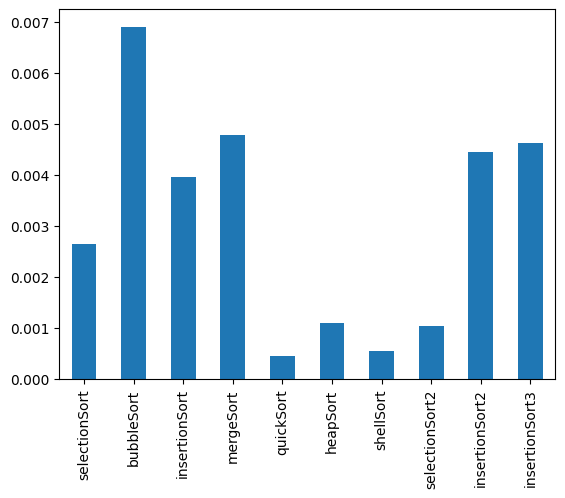

In [45]:
df.mean().plot(kind="bar")

In [46]:
# 선택 정렬 함수
def selectionSort3(A:list, n:int):
    if n < 2:
        for i in range(1, listLength):
            if A[i] == A[0]:
                A.insert(i, A.pop(0))
                break
        return
    k = A.index(max(A[:n-1])) # 가장 큰 값의 인덱스를 k로 한다.
    A.insert(n-1, A.pop(k)) # 가장 큰 값을 빼내 맨 뒤에 넣는다.
    selectionSort3(A, n-1) # 재귀로 최댓값이 정렬된 부분을 제외하고 정렬

In [47]:
A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
selectionSort3(A, listLength)
print(A)

[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 14, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 22, 22, 22, 23, 23, 24, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 32, 32, 32, 32, 32, 33, 33, 34, 34, 35, 35, 35, 36, 37, 37, 37, 38, 38, 38, 38, 39, 39, 40, 40, 41, 41, 41, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 49, 50, 50, 50, 51, 51, 51, 51, 51, 51, 52, 52, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 59, 60, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 63, 63, 64, 64, 65, 65, 65, 66, 67, 67, 68, 68, 69, 69, 69, 70, 70, 71, 71, 72, 72, 72, 72, 73, 73, 73, 74, 74, 74, 74, 75, 75, 75, 76, 76, 77, 77, 77, 77, 79, 79, 79, 80, 80, 80, 81, 81, 82, 82, 82, 82, 82, 83, 83, 84, 85, 85, 85, 86, 87, 87, 87, 88, 8

In [48]:
# 선택 정렬3
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Selection Sort3: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    selectionSort3(A, listLength) # 삽입 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['selectionSort3'] = pd.DataFrame(sortTimes) # selectionSort3 열에 걸린 시간들 전체 저장

Execution Number of Selection Sort3: 99
Execution Number of Selection Sort3: 199
Execution Number of Selection Sort3: 299
Execution Number of Selection Sort3: 399
Execution Number of Selection Sort3: 499
Execution Number of Selection Sort3: 599
Execution Number of Selection Sort3: 699
Execution Number of Selection Sort3: 799
Execution Number of Selection Sort3: 899
Execution Number of Selection Sort3: 999
Execution Number of Selection Sort3: 1099
Execution Number of Selection Sort3: 1199
Execution Number of Selection Sort3: 1299
Execution Number of Selection Sort3: 1399
Execution Number of Selection Sort3: 1499
Execution Number of Selection Sort3: 1599
Execution Number of Selection Sort3: 1699
Execution Number of Selection Sort3: 1799
Execution Number of Selection Sort3: 1899
Execution Number of Selection Sort3: 1999
Execution Number of Selection Sort3: 2099
Execution Number of Selection Sort3: 2199
Execution Number of Selection Sort3: 2299
Execution Number of Selection Sort3: 2399
Exe

<AxesSubplot:>

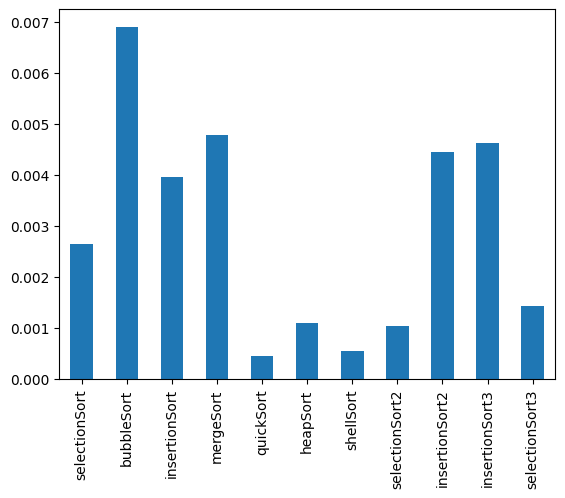

In [49]:
df.mean().plot(kind="bar")

##### 연습문제 풀이

In [50]:
# 17번
def quickSort2(A:list, p, r):
    if p < r:
        q = partition2(A, p, r)
        quickSort2(A, p, q-1)
        quickSort2(A, q+1, r)

def partition2(A:list, p, r):
    x = A[r] # 맨 마지막 원소를 피벗으로 잡는다.
    i = p-1
    for j in range(p, r):
        if A[j] < x:
            i += 1
            A[i], A[j] = A[j], A[i]
        if A[j] == x: # 피벗과 같은 원소인 경우
            if j % 2 == 1: # 홀수인 경우, 짝수일 때는 아무 연산도 하지 않게 하여 속도를 올린다.
                i += 1 # 왼쪽 인덱스를 1 올리고
                A[i], A[j] = A[j], A[i] # 서로 교환한다.
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

In [51]:
A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
quickSort2(A, 0, listLength-1)
print(A)

[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 26, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 38, 38, 39, 39, 39, 39, 40, 40, 42, 43, 43, 43, 43, 44, 44, 45, 45, 46, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 51, 51, 52, 53, 53, 53, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61, 62, 63, 63, 64, 65, 66, 67, 67, 67, 68, 68, 69, 69, 69, 69, 69, 70, 70, 71, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 74, 74, 75, 75, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 80, 80, 80, 80, 81, 82, 83, 83, 83, 83, 83, 83, 84, 85, 85, 

In [52]:
# 퀵 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Quick Sort2: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    quickSort2(A, 0, listLength-1) # 퀵 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['quickSort2'] = pd.DataFrame(sortTimes) # quickSort2 열에 걸린 시간들 전체 저장

Execution Number of Quick Sort2: 99
Execution Number of Quick Sort2: 199
Execution Number of Quick Sort2: 299
Execution Number of Quick Sort2: 399
Execution Number of Quick Sort2: 499
Execution Number of Quick Sort2: 599
Execution Number of Quick Sort2: 699
Execution Number of Quick Sort2: 799
Execution Number of Quick Sort2: 899
Execution Number of Quick Sort2: 999
Execution Number of Quick Sort2: 1099
Execution Number of Quick Sort2: 1199
Execution Number of Quick Sort2: 1299
Execution Number of Quick Sort2: 1399
Execution Number of Quick Sort2: 1499
Execution Number of Quick Sort2: 1599
Execution Number of Quick Sort2: 1699
Execution Number of Quick Sort2: 1799
Execution Number of Quick Sort2: 1899
Execution Number of Quick Sort2: 1999
Execution Number of Quick Sort2: 2099
Execution Number of Quick Sort2: 2199
Execution Number of Quick Sort2: 2299
Execution Number of Quick Sort2: 2399
Execution Number of Quick Sort2: 2499
Execution Number of Quick Sort2: 2599
Execution Number of Qui

<AxesSubplot:>

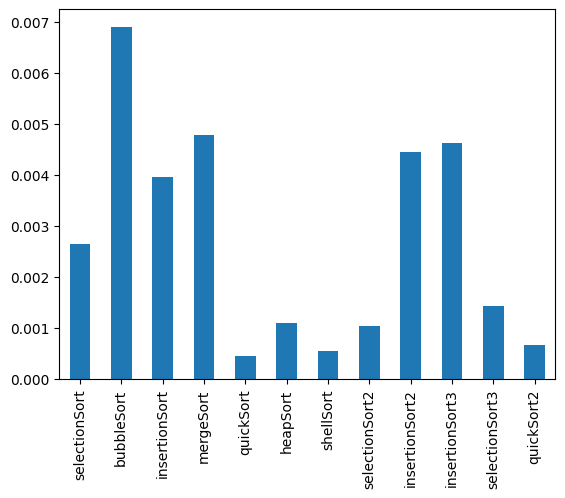

In [53]:
df.mean().plot(kind="bar")

In [54]:
# 19번
# 병합 정렬 함수
def mergeSort2(A:list, p:int, q:int): # p : 시작, q : 끝
    if p < q: # 시작 인덱스가 끝 인덱스보다 작을 때
        mid = (p+q) // 2 # 중간 부분의 인덱스
        mergeSort2(A, p, mid) # 시작부터 중간을 정렬(재귀호출)
        mergeSort2(A, mid+1, q) # 중간부터 끝을 정렬(재귀호출)
        merge2(A, p, mid+1, q) # 정렬된 리스트끼리 병합
        
def merge2(A:list, l, r, end): # 병합 함수(l = 왼쪽 시작 부분, r = 오른쪽 시작 부분)
    merged = [] # 병합된 리스트를 저장하는 변수
    i, j = l, r # i, j 시작값 설정
    while i < r and j <= end: # i와 j가 정해진 구역의 마지막에 갈 때까지 반복한다.
        if A[i] <= A[j]: # 왼쪽 구역의 원소가 오른쪽 구역의 원소보다 작으면
            merged.append(A[i]) # 왼쪽 구역의 원소를 merged에 넣는다.
            i += 1 # i를 1 증가시킨다.
        else: # 오른쪽 구역의 원소보다 크면
            merged.append(A[j]) # 오른쪽 구역의 원소를 넣는다.
            j += 1 # j를 1 증가시킨다.
    while i < r: # 왼쪽 구역에 원소가 남은 경우
        merged.append(A[i]) # 모두 그대로 merged에 넣는다.
        i += 1 # i를 1 증가시킨다.
    while j <= end: # 오른쪽 구역에 원소가 남은 경우
        merged.append(A[j]) # 모두 그대로 merged에 넣는다.
        j += 1 # j를 1 증가시킨다.
    i = l # i를 맨 앞으로 바꾼다.
    for n in merged: # 다시 A 리스트에 merged의 내용을 그대로 넣는다.
        A[i] = n
        i += 1

In [55]:
A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
mergeSort2(A, 0, listLength-1)
print(A)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 24, 24, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 30, 30, 31, 31, 31, 32, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 46, 46, 46, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 52, 52, 52, 52, 52, 53, 54, 54, 55, 55, 55, 57, 58, 58, 58, 59, 59, 59, 60, 60, 61, 61, 61, 61, 61, 62, 62, 63, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 67, 67, 67, 68, 69, 69, 69, 69, 70, 70, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 74, 74, 75, 75, 76, 76, 76, 77, 77, 77, 78, 78, 78, 78, 78, 78, 80, 80, 81, 82, 82, 82, 82, 82, 83, 83, 83, 84, 84, 84, 84, 8

In [56]:
# 병합 정렬 실행부
sortTimes = [] # 정렬에 걸린 시간을 저장하는 리스트(다시 초기화)
for i in range(0, numberOfExe): # numberOfExe번 반복
    if (i+1) % 100 == 0:
        print(f'Execution Number of Merge Sort2: {i}')
    A = [random.randint(0, 100) for i in range(listLength)] # 300개의 0~100 사이의 난수를 넣는다
    start = time.time() # 시작 시간
    mergeSort2(A, 0, listLength-1) # 병합 정렬 실행
    end = time.time() # 종료 시간
    sortTimes.append(end - start) # 리스트에 걸린 시간 저장
df['mergeSort2'] = pd.DataFrame(sortTimes) # mergeSort2 열에 걸린 시간들 전체 저장

Execution Number of Merge Sort2: 99
Execution Number of Merge Sort2: 199
Execution Number of Merge Sort2: 299
Execution Number of Merge Sort2: 399
Execution Number of Merge Sort2: 499
Execution Number of Merge Sort2: 599
Execution Number of Merge Sort2: 699
Execution Number of Merge Sort2: 799
Execution Number of Merge Sort2: 899
Execution Number of Merge Sort2: 999
Execution Number of Merge Sort2: 1099
Execution Number of Merge Sort2: 1199
Execution Number of Merge Sort2: 1299
Execution Number of Merge Sort2: 1399
Execution Number of Merge Sort2: 1499
Execution Number of Merge Sort2: 1599
Execution Number of Merge Sort2: 1699
Execution Number of Merge Sort2: 1799
Execution Number of Merge Sort2: 1899
Execution Number of Merge Sort2: 1999
Execution Number of Merge Sort2: 2099
Execution Number of Merge Sort2: 2199
Execution Number of Merge Sort2: 2299
Execution Number of Merge Sort2: 2399
Execution Number of Merge Sort2: 2499
Execution Number of Merge Sort2: 2599
Execution Number of Mer

<AxesSubplot:>

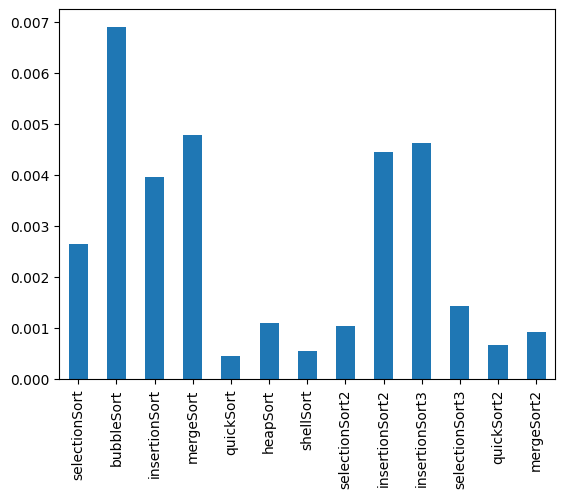

In [57]:
df.mean().plot(kind="bar")